C:\Users\pc\AppData\Local\Temp\ipykernel_14344\1890402317.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  infected = infected.groupby('Country/Region').sum()
C:\Users\pc\AppData\Local\Temp\ipykernel_14344\1890402317.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recovered = recovered.groupby('Country/Region').sum()
C:\Users\pc\AppData\Local\Temp\ipykernel_14344\1890402317.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for t

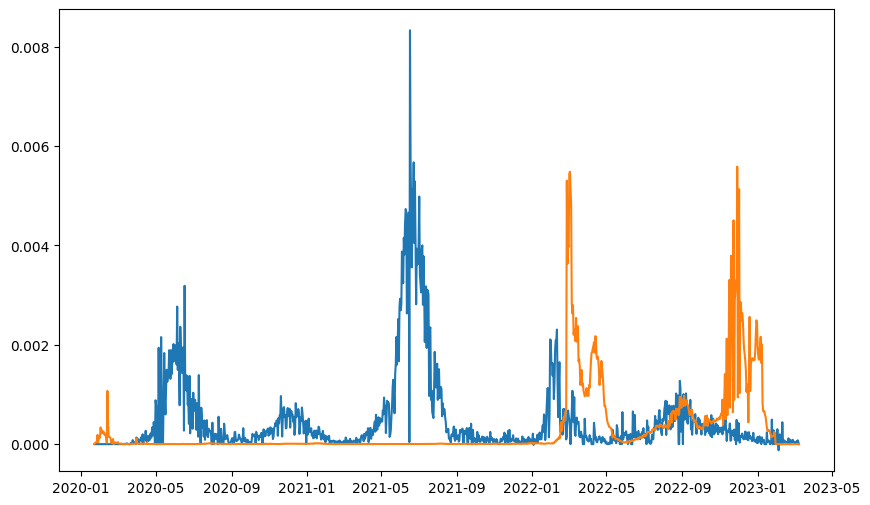

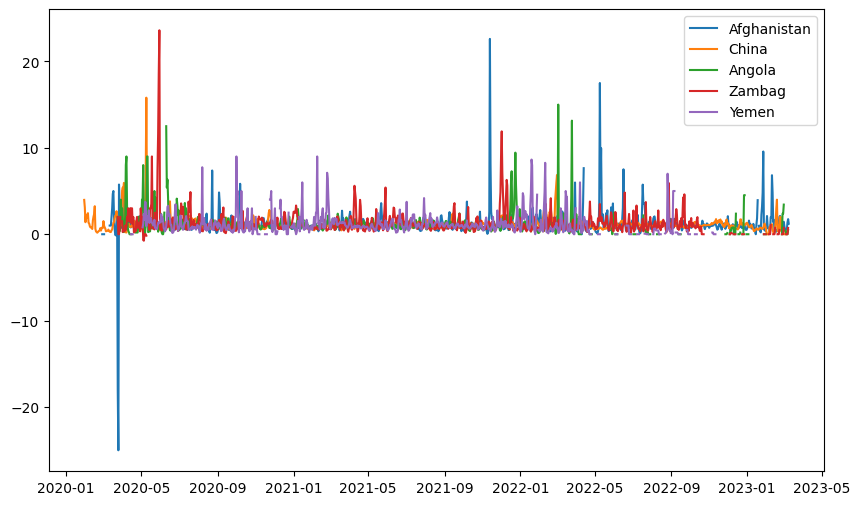

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


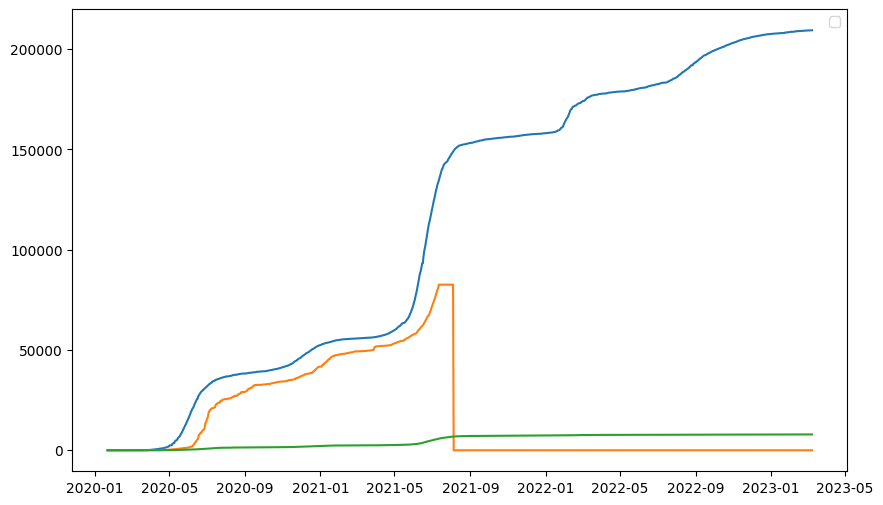

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"
infected = pd.read_csv(infected_dataset_url)
infected.head()
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"
#infected['Province/State'].value_counts()
#infected[infected('Province/State'=='China')]
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)
# Q1 spread between Afghanistan and China
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('Afghanistan')
chn= mkframe('China')
An=mkframe('Angola')
zm=mkframe('Zimbabwe')
ym=mkframe('Yemen')
chn
df['ninfected'] = df['infected'].diff()
chn['chinfected'] = chn['infected'].diff()
An['Aninfected']=An['infected'].diff()
zm['Zinfected']=zm['infected'].diff()
ym['Yinfected']=ym['infected'].diff()
#df['ninfected'].plot()
#plt.show()
countries = pd.read_csv(countries_dataset_url)
#countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]
#countries[(countries['Country_Region']=='China') & countries['Province_State'].isna()]
pop = countries[(countries['Country_Region']=='Afghanistan') & countries['Province_State'].isna()]['Population'].iloc[0]
pop2 = countries[(countries['Country_Region']=='China') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['ninfected']*100 / pop
chn['cinfected']=chn['chinfected']*100 / pop2
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['pinfected'], label='Afghanistan')
ax.plot(chn['cinfected'], label='China')
plt.show()
fig, ax = plt.subplots(figsize=(10,6))
# Q2 Plot graphs for several countries on one plot for comparison, or make several plots side-by-side
df['ninfected'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
ax.plot(df['ninfected'], label='Afghanistan')
chn['chinfected']=chn['chinfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
ax.plot(chn['chinfected'], label='China')
An['Aninfected']=An['Aninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
ax.plot(An['Aninfected'], label='Angola')
zm['Zinfected']=zm['Zinfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
ax.plot(zm['Zinfected'], label='Zambag')
ym['Yinfected']=ym['Yinfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
ax.plot(ym['Yinfected'], label='Yemen')
ax.legend()
plt.show()


# Q3 See how the number of deaths and recoveries correlate with number of infected cases.
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df['infected'])
ax.plot(df['recovered'])
ax.plot(df['deaths'])
ax.legend()
plt.show()
# Q4 Try to find out how long a typical disease lasts by visually correlating infection rate and deaths rate and looking for some anomalies. You may need to look at different countries to find that out
# Infection Rate = (Number of New Cases of the Disease / Total Population at Risk) x 100%
# Death Rate = (Number of Deaths due to the Disease / Total Number of People Infected with the Disease) x 100%
chn['Infection_Rate_china']=chn['chinfected']*100/pop2
df['infection_Rate_afg']=df['ninfected']*100/pop
#df['infection_Rate_afg']
#chn['Infection_Rate_china']
#chn['chinfected']

y=chn['chinfected']
#fig, ax = plt.subplots(figsize=(10,6))
#ax.plot(df['Infection_Rate_china'])
#ax.plot(chn['infection_Rate_afg'])
chn.to_csv('my_data.csv', index=False)
#ax.legend()
#plt.show()